In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_excel(r"C:\Users\91934\OneDrive\Documents\EDA_Dataset\Day-7CE-1\DA314_S7_EmployeePerformance_Data_Concept.xlsx")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,performance_score,years_since_last_promotion,is_eligible_for_promotion,experience_level,training_effectiveness_ratio
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,57.9,2,0,Senior,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,66.5,2,1,Mid-Level,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,52.8,5,0,Mid-Level,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,36.3,2,0,Senior,25
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,69.2,2,0,Entry-Level,73


In [3]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted',
       'performance_score', 'years_since_last_promotion',
       'is_eligible_for_promotion', 'experience_level',
       'training_effectiveness_ratio'],
      dtype='object')

In [4]:
df.drop_duplicates(inplace = True)
df['previous_year_rating' ] = df['previous_year_rating' ].fillna(0)
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].mode() [0])
df['department'] = df['department'].str.title()
df['region'] = df['region'].str.title()
df['education'] = df['education'].str.title()
df['gender'] = df['gender'].str. lower()
df['recruitment_channel' ] = df['recruitment_channel'].str. lower()
summary = df['age' ].describe()
print(summary)
median_age = df['age'].median()
mode_age = df['age' ].mode() [0]
skewness_age = skew(df['age'])

print(f"median : {median_age}")

print(f"mode : {mode_age}")

print(f"skewness : {round(skewness_age, 2)}")


count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64
median : 33.0
mode : 30
skewness : 1.01


Text(0.5, 1.0, 'Age Distribution (Histogram)')

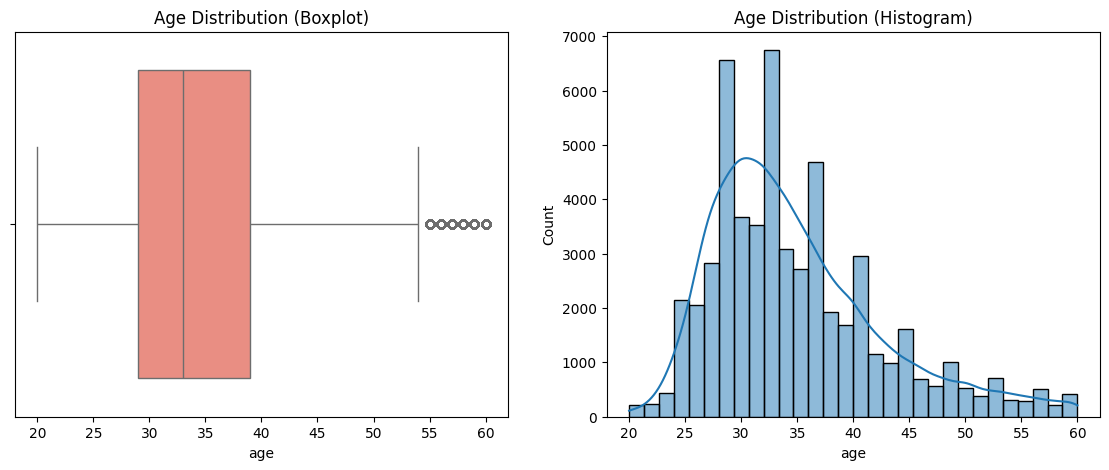

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)

sns.boxplot(x=df['age'], color='salmon')


plt.xlabel("age")
plt.title("Age Distribution (Boxplot)")


plt.subplot(1, 2, 2)
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Age Distribution (Histogram)")

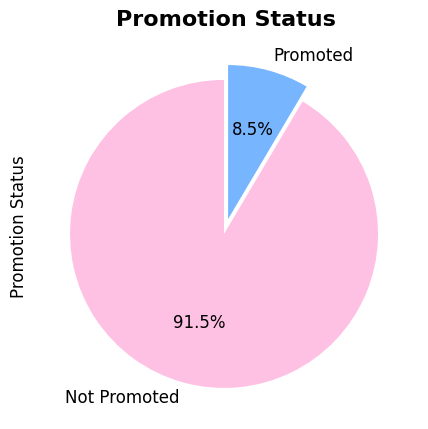

In [8]:
promotion_counts = df['is_promoted' ].value_counts()



labels = ["Not Promoted","Promoted"]
colors = ["#FFC1E3", "#77B5FE"]


explode = [0.05, 0.05]
plt.figure(figsize=(8,5))
plt.pie(promotion_counts,
labels=labels,
autopct='%.1f%%',
colors=colors,
explode=explode,
startangle=90,
textprops={'fontsize': 12})

plt.title("Promotion Status", fontsize=16, fontweight='bold')
plt.ylabel("Promotion Status", fontsize=12)
plt.show()

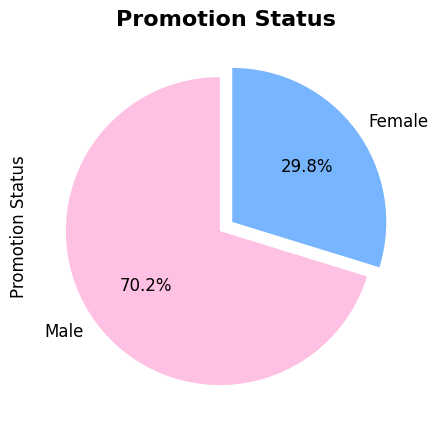

In [9]:
gender_counts = df['gender' ].value_counts()



labels_g = ["Male","Female"]
colors = ["#FFC1E3", "#77B5FE"]


explode = [0.05, 0.05]
plt.figure(figsize=(8,5))
plt.pie(gender_counts,
labels=labels_g,
autopct='%.1f%%',
colors=colors,
explode=explode,
startangle=90,
textprops={'fontsize': 12})

plt.title("Promotion Status", fontsize=16, fontweight='bold')
plt.ylabel("Promotion Status", fontsize=12)
plt.show()

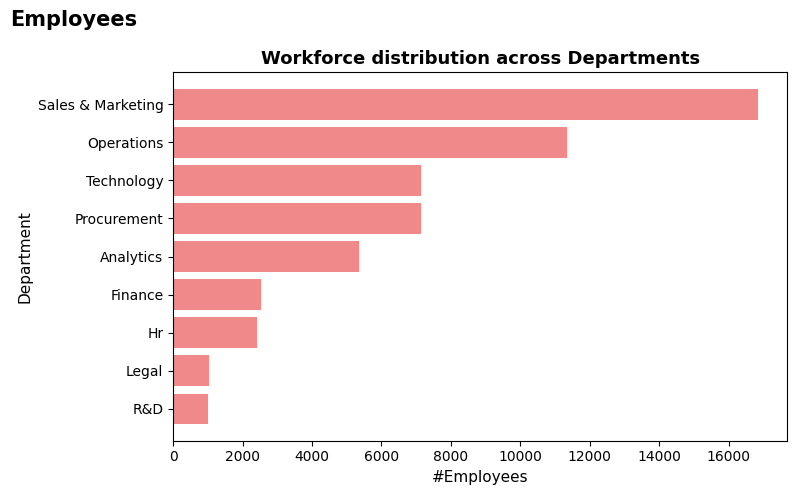

In [9]:
dept_counts = df. groupby('department') ['employee_id' ]. count().sort_values(ascending=True)
plt.figure(figsize=(8, 5))
plt.barh(dept_counts.index, dept_counts.values, color='#F08A8A')
plt.title('Workforce distribution across Departments', fontsize=13, weight='bold')
plt.xlabel('#Employees', fontsize=11)
plt.ylabel('Department', fontsize=11)
plt.suptitle('Employees', fontsize=15, weight='bold', x=0.01, ha='left')
plt.tight_layout()
plt.show()

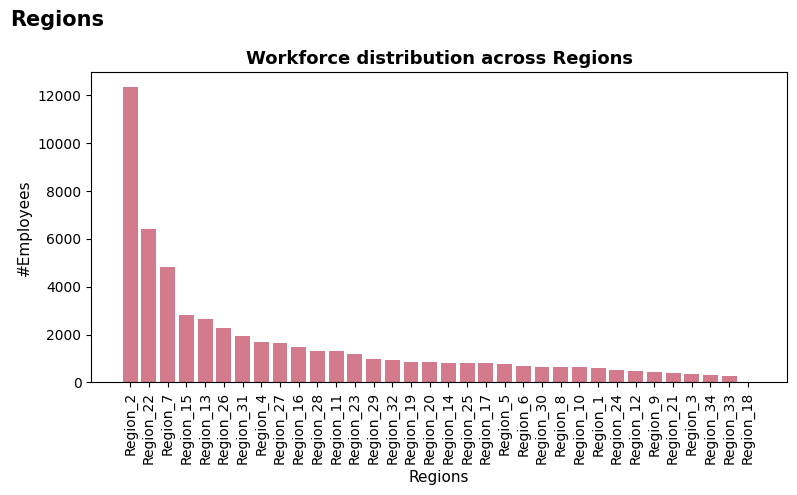

In [10]:
regn_counts = df. groupby('region') ['employee_id' ]. count().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(regn_counts.index, regn_counts.values, color='#D37A8C')
plt.title('Workforce distribution across Regions', fontsize=13, weight='bold')
plt.ylabel('#Employees', fontsize=11)
plt.xlabel('Regions', fontsize=11)
plt.xticks(rotation = 90)
plt.suptitle('Regions', fontsize=15, weight='bold', x=0.01, ha='left')
plt.tight_layout()
plt.show()

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   Region_7  Master'S & Above      f   
1        65141         Operations  Region_22        Bachelor'S      m   
2         7513  Sales & Marketing  Region_19        Bachelor'S      m   
3         2542  Sales & Marketing  Region_23        Bachelor'S      m   
4        48945         Technology  Region_26        Bachelor'S      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  \
0                  8           0                49.0            0   
1       

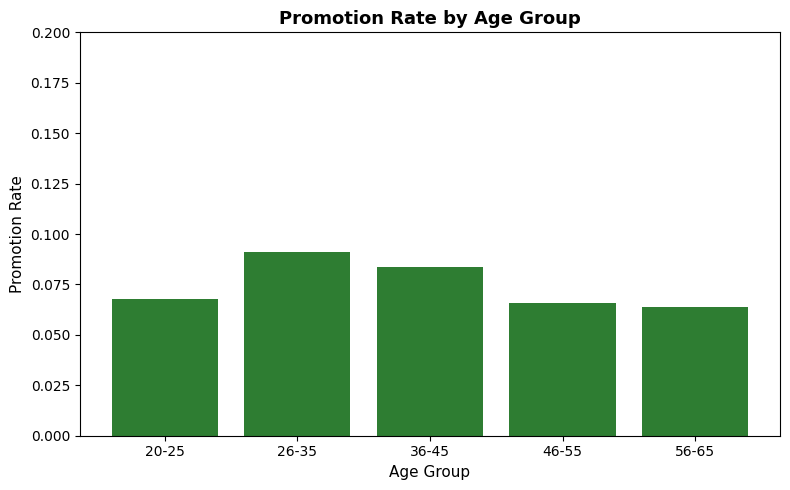

In [17]:
bins = [20, 25, 35, 45, 55, 65]
labels = ['20-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
print(df.head())
promotion_rate = df. groupby('age_group', observed=False) ['is_promoted' ].mean()
plt.figure(figsize=(8, 5))
plt.bar(promotion_rate.index, promotion_rate.values, color='#2E7D32')
plt.title('Promotion Rate by Age Group', fontsize=13, weight='bold')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Promotion Rate', fontsize=11)
plt.ylim(0, 0.20)
plt.tight_layout()
plt.show()

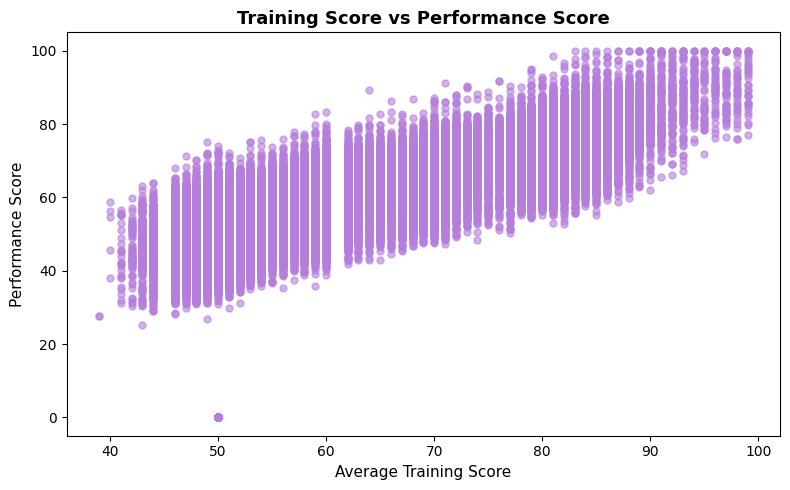

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(df['avg_training_score'], df['performance_score'],
alpha=0.6, s=25, color='#B57EDC')

plt.title('Training Score vs Performance Score', fontsize=13, weight='bold')
plt.xlabel('Average Training Score', fontsize=11)
plt.ylabel('Performance Score', fontsize=11)
plt.tight_layout()
plt.show()